<a href="https://colab.research.google.com/github/chaeyoung97/google-CoLab/blob/master/WineClassifier_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import keras

keras.__version__

'2.3.1'

In [0]:
from keras import Sequential
from keras.layers import Dense, Activation

In [0]:
import pandas as pd
pd.__version__
pd.options.display.max_rows=15

In [0]:
import numpy as np
np.__version__

'1.18.4'

In [0]:
#########################코드########################
red_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')


#####################################################

In [0]:
display(white_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [0]:
display(red_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [0]:
#####################################################
from sklearn.model_selection import train_test_split
def generate_data(df, t_r):

    X = df.drop('quality', axis = 1) # axis 는 삭제를 행 /열 중 뭐로 기준할 것인지 명시함 1이면 열 기준 삭제
    Y = df['quality']

    X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size = 1 - t_r, random_state = 64) #random_state하면 실행 시킬 때 마다 같은 기준으로 나눠줌!
    Y_train, Y_test = Y_train.values, Y_test.values
    return X_train.values, Y_train, X_test.values, Y_test
#####################################################

In [0]:
x_train, y_train, x_test, y_test = generate_data(white_wine, 0.7)

In [0]:
print("x_train: " ,x_train.shape, "\ny_train: ",y_train.shape, "\nx_test : ",x_test.shape,"\ny_test : ",y_test.shape)

x_train:  (3428, 11) 
y_train:  (3428,) 
x_test :  (1470, 11) 
y_test :  (1470,)



* 하나의 히든 레이어에 32개의 노드를 가진 인공신경망 모델 생성 및 모델 학습
* 트레이닝 Epoch에 따라 Loss의 변화를 그래프로 시각화
* 테스트 셋에 대한 정확도 기록

In [0]:
##########################################################
import tensorflow as tf

model = Sequential()
model.add(Dense(units=32,activation = 'relu', input_dim = 11)) #input_shape=(11,)
model.add(Dense(units =11, activation = 'softmax'))

model.compile(optimizer = 'Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
###########################################################

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 32)                384       
_________________________________________________________________
dense_26 (Dense)             (None, 11)                363       
Total params: 747
Trainable params: 747
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x_train, y_train, epochs =200) #batch_size = 몇개의 샘플로 가중치 갱신할 것인지 지정

Epoch 1/200
3428/3428 [==============================] - 0s 83us/step - loss: 4.8200 - accuracy: 0.4046
Epoch 2/200
3428/3428 [==============================] - 0s 67us/step - loss: 1.5690 - accuracy: 0.4064
Epoch 3/200
3428/3428 [==============================] - 0s 67us/step - loss: 1.3556 - accuracy: 0.4317
Epoch 4/200
3428/3428 [==============================] - 0s 67us/step - loss: 1.2957 - accuracy: 0.4373
Epoch 5/200
3428/3428 [==============================] - 0s 66us/step - loss: 1.2947 - accuracy: 0.4361
Epoch 6/200
3428/3428 [==============================] - 0s 73us/step - loss: 1.2663 - accuracy: 0.4533
Epoch 7/200
3428/3428 [==============================] - 0s 68us/step - loss: 1.2481 - accuracy: 0.4641
Epoch 8/200
3428/3428 [==============================] - 0s 69us/step - loss: 1.2495 - accuracy: 0.4577
Epoch 9/200
3428/3428 [==============================] - 0s 65us/step - loss: 1.2650 - accuracy: 0.4501
Epoch 10/200
3428/3428 [==============================] - 0s 68u

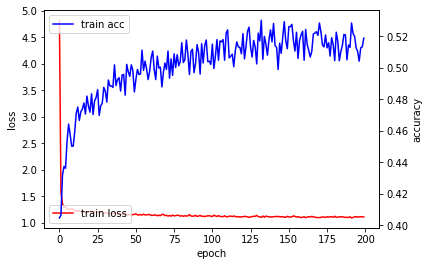

In [0]:
####################################
#트레이닝 epoch에 따라 loss와 accuracy 의 변화를 그래프로 시각화

import matplotlib.pyplot as plt
%matplotlib inline

fig , loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'r', label = 'train loss')

acc_ax.plot(history.history['accuracy'], 'b', label = 'train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='lower left')
acc_ax.legend(loc = 'upper left')

plt.show()


In [0]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("test accuracy: ",test_accuracy,"\ntest loss:    ",test_loss)

1470/1470 [==============================] - 0s 48us/step
test accuracy:  0.5292516946792603 
test loss:     1.1421082686404793


<앞에서 만든 모델 성능을 향상시킬 방법을 적용>
1. 하이퍼파라미터 변경하여  테스트 셋 정확도 향상 
(레이어 수 , 노드 수, 러닝 레이트 등..)
2. 하이퍼파라미터를 변화시킨 각각의 모델에 대해 , 트레이닝 epoch당 loss변활를 기록, 시각화
3. 그 외에 여러 방법 적용하여 가장 성능 좋은 모델을 선택함 dropout nomalization 등..

In [0]:
##########################################################

##1 Normalization (데이터를 0~1로 normalize한다.)



def norm(w):
    wine = w.copy()
    for i in wine:
        if(i=='quality'):
            continue
        wine[i] = (wine[i] - wine[i].min()) / (wine[i].max() - wine[i].min())
    return wine

red1 = norm(red_wine)
white1 = norm(white_wine)
print(red1.describe())
print(white1.describe())
print(white_wine.describe())


###########################################################

       fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        0.329171          0.279329  ...     0.311228     5.636023
std         0.154079          0.122644  ...     0.163949     0.807569
min         0.000000          0.000000  ...     0.000000     3.000000
25%         0.221239          0.184932  ...     0.169231     5.000000
50%         0.292035          0.273973  ...     0.276923     6.000000
75%         0.407080          0.356164  ...     0.415385     6.000000
max         1.000000          1.000000  ...     1.000000     8.000000

[8 rows x 12 columns]
       fixed acidity  volatile acidity  ...      alcohol      quality
count    4898.000000       4898.000000  ...  4898.000000  4898.000000
mean        0.293730          0.194354  ...     0.405527     5.877909
std         0.081141          0.098818  ...     0.198487     0.885639
min         0.000000          0.000000  ...     0.000000     3.0000

In [0]:
##2. model의 하이퍼파라미터 변경
from keras.layers import Dropout ,BatchNormalization
from keras.optimizers import Adam , SGD


model2 = Sequential()
model2.add(Dense(units=2048,activation = 'relu', input_dim =11)) #input_shape=(11,)
model2.add(BatchNormalization())
model2.add(Dense(units =2048, activation = 'relu'))

model2.add(Dense(units =1024, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units =512, activation = 'relu'))
model2.add(BatchNormalization())
model2.add(Dense(units =512, activation = 'relu'))
model2.add(Dense(units =256, activation = 'relu'))
model2.add(Dense(units =128, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units =64, activation = 'relu'))
model2.add(BatchNormalization())
model2.add(Dense(units =32, activation = 'relu'))
model2.add(Dense(units=11, activation='softmax'))
#목표인 퀄리티가 정수여서 sparse_categorical_crossentropy사용함
#sgd = SGD(lr = 0.01 , decay = 1e-6, momentum = 0.9, nesterov = True)
model2.compile(optimizer = Adam(lr = 0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2048)              24576     
_________________________________________________________________
batch_normalization_1 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_4 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)              

In [0]:
from keras.callbacks import EarlyStopping
x_train2, y_train2, x_test2, y_test2 = generate_data(white1, 0.7)

history = model2.fit(x_train2, y_train2, epochs =200) #batch_size = 몇개의 샘플로 가중치 갱신할 것인지 지정
# validation_data =(x_val, y_val), callbacks = [early_stopping]

Epoch 1/200
3428/3428 [==============================] - 1s 259us/step - loss: 1.3706 - accuracy: 0.4673
Epoch 2/200
3428/3428 [==============================] - 1s 257us/step - loss: 1.1274 - accuracy: 0.5213
Epoch 3/200
3428/3428 [==============================] - 1s 254us/step - loss: 1.0953 - accuracy: 0.5207
Epoch 4/200
3428/3428 [==============================] - 1s 256us/step - loss: 1.0586 - accuracy: 0.5432
Epoch 5/200
3428/3428 [==============================] - 1s 255us/step - loss: 1.0500 - accuracy: 0.5470
Epoch 6/200
3428/3428 [==============================] - 1s 257us/step - loss: 1.0366 - accuracy: 0.5621
Epoch 7/200
3428/3428 [==============================] - 1s 261us/step - loss: 1.0259 - accuracy: 0.5581
Epoch 8/200
3428/3428 [==============================] - 1s 262us/step - loss: 1.0124 - accuracy: 0.5729
Epoch 9/200
3428/3428 [==============================] - 1s 260us/step - loss: 0.9976 - accuracy: 0.5773
Epoch 10/200
3428/3428 [==============================]

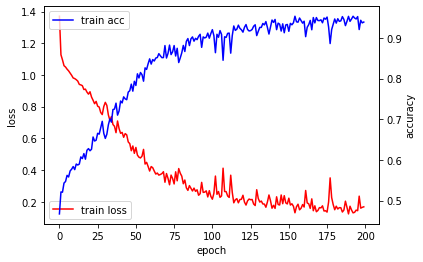

In [0]:
####################################
#트레이닝 epoch에 따라 loss와 accuracy 의 변화를 그래프로 시각화

import matplotlib.pyplot as plt
%matplotlib inline

fig , loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'r', label = 'train loss')

acc_ax.plot(history.history['accuracy'], 'b', label = 'train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='lower left')
acc_ax.legend(loc = 'upper left')

plt.show()


In [0]:
test_loss, test_accuracy = model2.evaluate(x_test2, y_test2)
print("test accuracy: ",test_accuracy,)

1470/1470 [==============================] - 0s 68us/step
test accuracy:  0.6319727897644043


* 화이트 와인과 레드 와인 데이터를 합쳐 wine 데이터 셋 생성




In [0]:
##########################################################
#1. 데이터 합치기
red2 = norm(red_wine)
white2 = norm(white_wine)
red2['type'] = 0.0
white2['type'] = 1.0
print(red2.head(2))
print(white2.head(2))

wine = pd.concat([red2, white2])
x_train3, y_train3, x_test3, y_test3 = generate_data(wine, 0.7)


model3= Sequential()
model3.add(Dense(units=4096,activation = 'relu', input_dim =12)) #input_shape=(12,)
model3.add(BatchNormalization())
model3.add(Dense(units =2048, activation = 'relu'))
model3.add(Dense(units =1024, activation = 'relu'))
model3.add(BatchNormalization())
model3.add(Dense(units =512, activation = 'relu'))
model3.add(Dense(units =512, activation = 'relu'))
model3.add(Dropout(0.2))
model3.add(Dense(units =256, activation = 'relu'))
model3.add(BatchNormalization())
model3.add(Dense(units =128, activation = 'relu'))
model3.add(Dropout(0.3))
model3.add(Dense(units =64, activation = 'relu'))
model3.add(BatchNormalization())
model3.add(Dense(units =32, activation = 'relu'))
model3.add(Dense(units=11, activation='softmax'))
#목표인 퀄리티가 정수여서 sparse_categorical_crossentropy사용함
sgd = SGD(lr = 0.01 , decay = 1e-6, momentum = 0.9, nesterov = True)
model3.compile(optimizer = Adam(lr = 0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.summary()
pass


###########################################################

   fixed acidity  volatile acidity  citric acid  ...   alcohol  quality  type
0       0.247788          0.397260          0.0  ...  0.153846        5   0.0
1       0.283186          0.520548          0.0  ...  0.215385        5   0.0

[2 rows x 13 columns]
   fixed acidity  volatile acidity  citric acid  ...   alcohol  quality  type
0       0.307692          0.186275     0.216867  ...  0.129032        6   1.0
1       0.240385          0.215686     0.204819  ...  0.241935        6   1.0

[2 rows x 13 columns]
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 4096)              53248     
_________________________________________________________________
batch_normalization_4 (Batch (None, 4096)              16384     
_________________________________________________________________
dense_14 (Dense)             (None, 2048)              8390656   
__

In [0]:

x_val, y_val ,x,y = generate_data(wine, 0.3)

early_stopping = EarlyStopping(patience =50)
history = model3.fit(x_train3, y_train3, epochs =2000, validation_data =(x_val, y_val), callbacks = [early_stopping]) #batch_size = 몇개의 샘플로 가중치 갱신할 것인지 지정
# validation_data =(x_val, y_val), callbacks = [early_stopping]

Train on 4547 samples, validate on 1949 samples
Epoch 1/2000
4547/4547 [==============================] - 2s 501us/step - loss: 1.3930 - accuracy: 0.4614 - val_loss: 1.3194 - val_accuracy: 0.4844
Epoch 2/2000
4547/4547 [==============================] - 2s 357us/step - loss: 1.1676 - accuracy: 0.5107 - val_loss: 1.2141 - val_accuracy: 0.4341
Epoch 3/2000
4547/4547 [==============================] - 2s 352us/step - loss: 1.1345 - accuracy: 0.5140 - val_loss: 1.2234 - val_accuracy: 0.4767
Epoch 4/2000
4547/4547 [==============================] - 2s 350us/step - loss: 1.1005 - accuracy: 0.5291 - val_loss: 1.0905 - val_accuracy: 0.5105
Epoch 5/2000
4547/4547 [==============================] - 2s 345us/step - loss: 1.0819 - accuracy: 0.5399 - val_loss: 1.0648 - val_accuracy: 0.5562
Epoch 6/2000
4547/4547 [==============================] - 2s 340us/step - loss: 1.0816 - accuracy: 0.5307 - val_loss: 1.0794 - val_accuracy: 0.5326
Epoch 7/2000
4547/4547 [==============================] - 2s 348

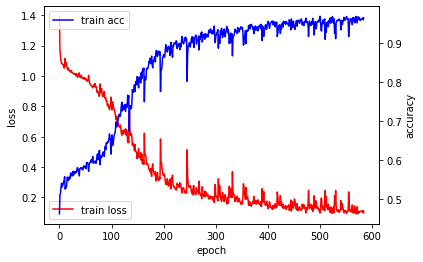

In [0]:
####################################
#트레이닝 epoch에 따라 loss와 accuracy 의 변화를 그래프로 시각화


fig , loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'r', label = 'train loss')

acc_ax.plot(history.history['accuracy'], 'b', label = 'train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='lower left')
acc_ax.legend(loc = 'upper left')

plt.show()


In [0]:
test_loss, test_accuracy = model3.evaluate(x_test3, y_test3)
print("test accuracy: ",test_accuracy,)

1950/1950 [==============================] - 0s 75us/step
test accuracy:  0.6353846192359924
